# TP5 : Masse et rigidité 

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import linalg as LA 
from scipy.linalg import toeplitz 
from scipy.sparse import csr_matrix #Utile pour les matrices creuses (cf. Partie 2). 

## Table des matières 
0.  [Previous functions](#part0)
1. [Exercice 1](#part1)
2. [Exercice 2](#part2)
3. [Exercice 3](#part3)

## Previous functions <a id="part0"></a>

In [33]:
def LoadVTX(nom_du_fichier) : 
    f = open(nom_du_fichier, 'r')
    f.readline() #On lit '$Noeuds', que l'on ignore. 
    nbr_vtx = int(f.readline()) #Conversion str -> int
    resultat = []
    for i in range(nbr_vtx) : 
        ligne = f.readline()
        tableau = ligne.split()
        couple = []
        couple.append(float(tableau[1])) #Conversion str -> float
        couple.append(float(tableau[2]))
        resultat.append(couple)
    f.close()
    return resultat 

def LoadELT(nom_du_fichier) : 
    f = open(nom_du_fichier, 'r') 
    f.readline() #On lit '$Noeuds', que l'on ignore. 
    nbr_vtx = int(f.readline()) #Conversion str -> int
    for i in range(nbr_vtx + 2) : #Lecture des vtx puis de '$FinNoeuds', '$Elements'.
        f.readline()
    nbr_elt = int(f.readline())
    resultat = []
    for i in range(nbr_elt) :
        ligne = f.readline()
        tableau = ligne.split() 
        triplet = []
        triplet.append(int(tableau[1])) #Conversion str -> int
        triplet.append(int(tableau[2]))
        triplet.append(int(tableau[3]))
        resultat.append(triplet)
    f.close()
    return resultat 

def PlotMesh(vtx,elt) : 
    X = [vtx[i][0] for i in range(len(vtx))]
    Y = [vtx[j][1] for j in range(len(vtx))]
    plt.triplot(X,Y,elt)
    nb_elements = len(elt)
    plt.title(fr"Maillage à ${nb_elements}$ éléments.")
    plt.axis('equal')
    
def Boundary(elt):
    D = {} #Dictionnaire vide visant à contenir les arêtes sur le bord ainsi la table de correspondance 
    Nc = len(elt) #Nombre de cellules 

    for i in range(Nc):
        
        s0 = int(elt[i][0]) 
        s1 = int(elt[i][1])  
        s2 = int(elt[i][2]) 
        
        b0=(s0,s1) #arête n°2
        b1=(s1,s2) #arête n°0
        b2=(s2,s0) #arête n°1 
        L = (b0,b1,b2) #Liste contenant les 3 arêtes du i-ème triangle 
    

        for k,b in zip([2,0,1], L):
            if b not in D.keys(): #Si l'arête b n'est pas dans D on l'ajoute avec la clée suivante. 
                D[b] = 3*i+k
            else : #Si b est déjà dans D, elle apparait plusieurs fois donc n'est pas dans le bord. 
                D.pop(b)
            if b[::-1] in D.keys(): #Si l'inverse de b est dans D, on enlève b et son inverse. 
                D.pop(b[::-1])
                D.pop(b)
        
    
    eltb = list(D.keys())
    be2e = list(D.values())
    #Conversion des list en tableaux numpy 
    eltb = np.array(eltb)
    be2e = np.array(be2e)
        
    #return eltb,be2e 
    return eltb #Ici seul eltb nous interesse.

## Exercice 1 <a id="part1"></a>

>**Question 1.** Définition de `Mloc`. 
>
> On remarque que la matrice de masse est une matrice de Toeplitz. C'est un cas particulier des matrices à bandes, que nous avons évoqué en cours. 
Ainsi, la matrice de masse élémentaire $M^{\tau}$ admet comme expression : 
>
>$$M_{j,k}^{\tau}= \displaystyle \int_{\tau} \phi_j^{\tau} \phi_k^{\tau} \,dx$$
>
>En utilisant le Lemme 8.1 : $\displaystyle \int_{\tau} \phi_0^{\tau}(x)^{\alpha_0}...\phi_n^{\tau}(x)^{\alpha_n} \, dx = \dfrac{n!\alpha_0!...\alpha_n!}{(n+\alpha_0+...+\alpha_n)!}|\tau|$, il vient que :
$M^{\tau} = \dfrac{|\tau|}{12}
\begin{pmatrix}
2 & 1 & 1 \\
1 & 2 & 1 \\
1 & 1 & 2 \\
\end{pmatrix}
$

In [14]:
def Mloc(vtx, e) : 
    if(len(e)==3) : 
        mat=toeplitz(np.array([2,1,1]))/12
        #L'aire du triangle ABC est par définition la norme du produit vectoriel AB v AC 
        """ 
        Écrire ici : 
        T=LA.norm(np.cross(vtx[e[0]] - vtx[e[1]], vtx[e[1]] - vtx[e[2]]))/2
        L'opérateur - n'étant pas défini pour les list 
        On doit convertir les list en tableau numpy pour les soustraire 
        """
        T=LA.norm(np.cross(np.array(vtx[e[0]]) - np.array(vtx[e[1]]), np.array(vtx[e[1]]) - np.array(vtx[e[2]])))/2 # par défaut la norme 2
    
        return T*mat

In [15]:
vtx = LoadVTX('maillage1.msh')
elt = LoadELT('maillage1.msh')
Mloc(vtx,elt[0])

array([[0.08333333, 0.04166667, 0.04166667],
       [0.04166667, 0.08333333, 0.04166667],
       [0.04166667, 0.04166667, 0.08333333]])

> **Question 2.** : Modification de `Mloc`pour prendre en charge les arètes. 

In [16]:
def Mloc(vtx, e) : 
    if(len(e)==3) : 
        mat=toeplitz(np.array([2,1,1]))/12
        #L'aire du triangle ABC est par définition la norme du produit vectoriel AB v AC 
        """ 
        Écrire ici : 
        T=LA.norm(np.cross(vtx[e[0]] - vtx[e[1]], vtx[e[1]] - vtx[e[2]]))/2
        L'opérateur - n'étant pas défini pour les list 
        On doit convertir les list en tableau numpy pour les soustraire 
        """
        T=LA.norm(np.cross(np.array(vtx[e[0]]) - np.array(vtx[e[1]]), np.array(vtx[e[1]]) - np.array(vtx[e[2]])))/2 # par défaut la norme 2
        return T*mat
        
    elif (len(e)==2) : 
        #Encore une fois ici par défaut c'est la norme 2, on calcule la longueur de l'arète.
        gamma=LA.norm([vtx[e[0]][0] - vtx[e[1]][0], vtx[e[0]][1] - vtx[e[1]][1]])
        mat=toeplitz(np.array([2,1]))/6 
        #ou bien simplement np.array([2,1],[1,2])
        return gamma*mat
    
        return T*mat

In [17]:
eltb = Boundary(elt)
Mloc(vtx,eltb[0])

array([[0.33333333, 0.16666667],
       [0.16666667, 0.33333333]])

> **Question 3.** Écriture de la fonction `Mass`. 

In [19]:
def Mass(vtx, elt) :
    
    vtx = np.array(vtx)
    elt = np.array(elt)
    
    Nv=len(vtx) #Nombre de sommets.
    
    Nc=len(elt) #Nombre de cellules.
    d=len(elt[0]) 
    
    #print ("Nv={}".format(Nv))
    #print("Nc={}".format(Nc))
    #print("d={}".format(d))
    
    I = np.zeros(d*d*Nc)
    J = np.zeros(d*d*Nc)
    V = np.zeros(d*d*Nc)
    
    k=0 
    
    for q in range(Nc):
        Ml = Mloc(vtx, elt[q])
        for l in range(d):
            for m in range(d):
                I[k] = elt[q,l]
                J[k] = elt[q,m]
                V[k] = Ml[l,m]
                k+=1
    return csr_matrix( (V, (I,J) ) , shape=(Nv,Nv) )

In [24]:
vtx = LoadVTX('maillage1.msh')
elt = LoadELT('maillage1.msh')
print(Mass(vtx,elt).toarray())

[[0.16666667 0.04166667 0.         0.         0.04166667 0.08333333
  0.         0.         0.         0.         0.         0.        ]
 [0.04166667 0.25       0.04166667 0.         0.         0.08333333
  0.08333333 0.         0.         0.         0.         0.        ]
 [0.         0.04166667 0.25       0.04166667 0.         0.
  0.08333333 0.08333333 0.         0.         0.         0.        ]
 [0.         0.         0.04166667 0.08333333 0.         0.
  0.         0.04166667 0.         0.         0.         0.        ]
 [0.04166667 0.         0.         0.         0.25       0.08333333
  0.         0.         0.04166667 0.08333333 0.         0.        ]
 [0.08333333 0.08333333 0.         0.         0.08333333 0.5
  0.08333333 0.         0.         0.08333333 0.08333333 0.        ]
 [0.         0.08333333 0.08333333 0.         0.         0.08333333
  0.5        0.08333333 0.         0.         0.08333333 0.08333333]
 [0.         0.         0.08333333 0.04166667 0.         0.
  0.

> **Question 4.**

In [30]:
vtx = np.array([[0.0, 1.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])
elt = np.array([[0, 1, 2], [0, 2, 3]])
Mass(vtx, elt).toarray()

array([[0.08333333, 0.04166667, 0.04166667, 0.        ],
       [0.04166667, 0.08333333, 0.04166667, 0.        ],
       [0.04166667, 0.04166667, 0.08333333, 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

> **Question 5.** Test sur la masse : 
$\newline$ 
$U^TMU=|\Omega|$ où $U=(1,...1)$.
>
>Notons que des erreurs d'arrondis peuvent intervenir. 

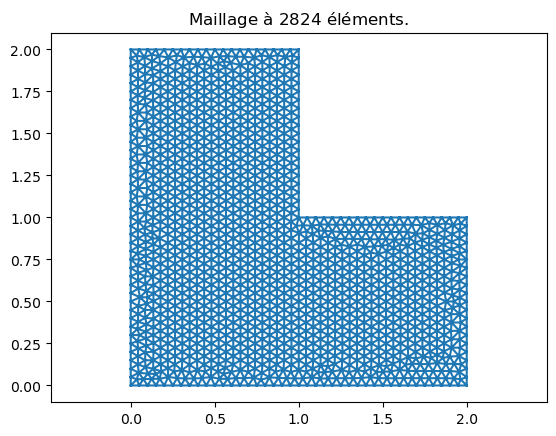

In [40]:
PlotMesh(vtx,elt) # On remarque facilement que l'aire de Omega est 3, et le périmètre est 8. 

In [46]:
vtx = LoadVTX('maillage6.msh')
elt = LoadELT('maillage6.msh')
U = np.ones(len(vtx))
print("Test sur l'aire : ", U@Mass(vtx,elt)@U)
print("Test sur le périmètre : ", U@Mass(vtx, Boundary(elt))@U)

Test sur l'aire :  3.0
Test sur le périmètre :  8.0


## Exercice 2 <a id="part2"></a>

> **Question 1.** On sait que $K_{ij}^{\tau} = \displaystyle \int_{\tau} \nabla \varphi_j^{\tau} \cdot \nabla \varphi_k^{\tau} \, dx$. 
$\varphi_j$ étant une fonction linéaire, son gradient est constant. Ainsi il vient que : 
>
>$$ K_{ij}^{\tau} = |\tau| \nabla \varphi_j^{\tau} \cdot \nabla \varphi_k^{\tau}, $$
>
>où $  \nabla \varphi_j^{\tau} \cdot \nabla \varphi_k^{\tau} = \dfrac{n_j^{\tau} \cdot n_k^{\tau}}{[(s_j^{\tau}-s_{j+1}^{\tau}) \cdot n_j^{\tau}][(s_k^{\tau}-s_{k+1}^{\tau}) \cdot n_k^{\tau}]}$, $n_j^{\tau} = e_3 \times (s_{j+1}^{\tau}-s_{j+2}^{\tau})$, avec $e_3=(0,0,1)$, car $d=2$. 

In [66]:
def Kloc(vtx,e) : 
    vtx = np.array(vtx)
    d = len(e) # dimension
    s = vtx[e] # sommets de l'élément e 
    K = np.zeros((d,d)) # matrice carée de taille d x d remplie de 0, à remplir ensuite
    T = LA.norm(np.cross(np.array(vtx[e[0]]) - np.array(vtx[e[1]]), np.array(vtx[e[1]]) - np.array(vtx[e[2]])))/2
    
    for i in range(d) : 
        for j in range(d) : 
            K[i,j] = np.inner(s[(i+1)%3]-s[(i+2)%3],s[(j+1)%3]-s[(j+2)%3])
    K/=(4*T)
    return K 

In [67]:
vtx = LoadVTX('maillage1.msh')
elt = LoadELT('maillage1.msh')
Kloc(vtx,elt[0])

array([[ 0.5, -0.5,  0. ],
       [-0.5,  1. , -0.5],
       [ 0. , -0.5,  0.5]])

> **Question 2.** Écriture de la fonction `Rig`. 

In [68]:
def Rig(vtx, elt) :
    
    vtx = np.array(vtx)
    elt = np.array(elt)
    
    Nv=len(vtx) #Nombre de sommets. 
    
    Nc=len(elt) #Nombre de cellules. 
    d=len(elt[0]) 
    
    #print ("Nv={}".format(Nv))
    #print("Nc={}".format(Nc))
    #print("d={}".format(d))

    I = np.zeros(d*d*Nc) #Pour les lignes.
    J = np.zeros(d*d*Nc) #Pour les colonnes. 
    V = np.zeros(d*d*Nc)
    
    k=0 
    
    for q in range(Nc):
        Ml = Kloc(vtx, elt[q])
        for l in range(d):
            for m in range(d):
                I[k] = elt[q,l]
                J[k] = elt[q,m]
                V[k] = Ml[l,m]
                k+=1
    return csr_matrix( (V, (I,J) ) , shape=(Nv,Nv) )

In [60]:
Rig(vtx,elt).toarray()

array([[ 2., -1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  4., -1.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  4., -1.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  4., -2.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0., -2.,  0.,  0., -2.,  8., -2.,  0.,  0., -2.,  0.,  0.],
       [ 0.,  0., -2.,  0.,  0., -2.,  8., -2.,  0.,  0., -2.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0., -2.,  4.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2.,  0.,  0., -1.,  4., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0., -1.,  4., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  2.]])

**Test sur la rigidité :**
$\newline$ 
$U^TKU=0$, où $U=(1,...1)_{N}$
$\newline$
Ce test peut renvoyer une valeur (très) proche de 0, à cause des erreurs d'arrondi.

In [61]:
U = np.ones(len(vtx))
U@Rig(vtx,elt)@U

0.0

> **Question 3.**

[[ 1.  -0.5  0.  -0.5]
 [-0.5  1.  -0.5  0. ]
 [ 0.  -0.5  1.  -0.5]
 [-0.5  0.  -0.5  1. ]]
Test matrice de rigidité :  0.0


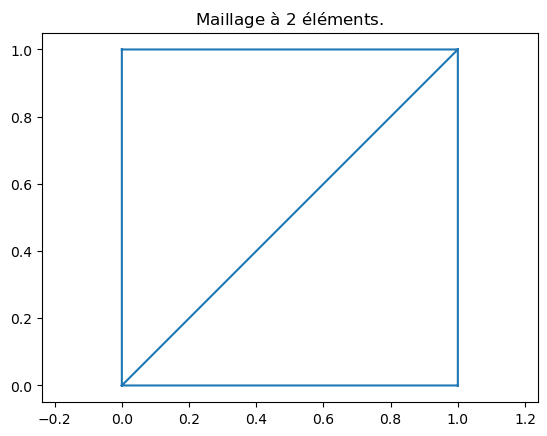

In [69]:
vtx=[[0.,0.], [1.,0.],[1.,1.],[0.,1.]]
elt=[[0,1,2],[0,2,3]]

PlotMesh(vtx,elt)

K = Rig(vtx,elt)
print(K.toarray())

U = np.ones(K.shape[0])

print("Test matrice de rigidité : ", U@K@U)

> **Question 4.**

In [70]:
vtx = LoadVTX('maillage1.msh')
elt = LoadELT('maillage1.msh')

K = Rig(vtx,elt) 
M = Mass(vtx,elt)

V = np.ones(len(vtx))

vol= V @ M @ V

#Génération d'une couple aléatoire de R^2
alpha = np.random.random((2,2)) 

#Génération d'une valeur aléaoire de R^2 
beta = np.random.random(2)

def u(i,x) : 
    return alpha[i,:] @ x + beta[i]

def U(i) :
    resultat=[]
    for x in vtx : 
        resultat.append(u(i,x))
    return resultat

print("Résultat 1 : ", U(0) @ K @ U(1))
print("Résultat 2 : ", (alpha[0,:] @ alpha[1, :])*vol)

Résultat 1 :  5.057184562847683
Résultat 2 :  5.057184562847685
